<a href="https://colab.research.google.com/github/iupui-soic/pybootcamp/blob/main/Shikhar_MIMICiv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
df_patients = pd.read_csv('/content/gdrive/MyDrive/mimic-iv/patients.csv.gz')
df_patients

,subject_id,gender,anchor_age,anchor_year,anchor_year_group,dod
0,10000032,F,52,2180,2014 - 2016,2180-09-09
1,10000048,F,23,2126,2008 - 2010,NaN
2,10000068,F,19,2160,2008 - 2010,NaN
3,10000084,M,72,2160,2017 - 2019,2161-02-13
4,10000102,F,27,2136,2008 - 2010,NaN
...,...,...,...,...,...,...
299772,19999828,F,46,2147,2017 - 2019,NaN
299773,19999829,F,28,2186,2008 - 2010,NaN
299774,19999840,M,58,2164,2008 - 2010,2164-09-17
299775,19999914,F,49,2158,2017 - 2019,NaN


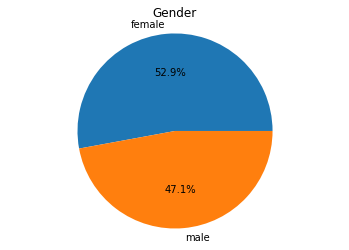

In [ ]:
#breakdown of gender
#descriptive visualization
import matplotlib.pyplot as plt
import numpy as np

my_data = df_patients['gender'].value_counts(normalize=True)*100
my_labels = 'female', 'male'
explode = (0.1,0.1)
plt.pie(my_data, labels=my_labels, autopct='%1.1f%%')
plt.title('Gender')
plt.axis('equal')
plt.show()

In [4]:
print(df_patients['gender'].value_counts())

F    158550
M    141227
Name: gender, dtype: int64


Text(0.5, 1.0, 'Approx age distribution of the patients')

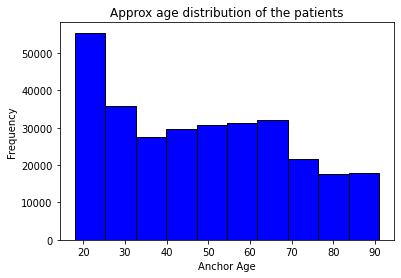

In [ ]:
plt.hist(df_patients['anchor_age'], color='blue', edgecolor='black')
plt.xlabel('Anchor Age')
plt.ylabel('Frequency')
plt.title('Approx age distribution of the patients')

The histogram only for the rows in df_patients where the dod (date of death) is not null, which means the rows where the patient has a recorded date of death. This is indicated by the expression df_patients['dod'].notnull(), which returns a boolean mask indicating which rows satisfy the condition.

The final result is a histogram showing the distribution of anchor_age values among patients who have a recorded date of death.

(array([ 220.,  351.,  457., 1077., 2016., 3054., 4580., 4500., 5226.,
        7607.]),
 array([18. , 25.3, 32.6, 39.9, 47.2, 54.5, 61.8, 69.1, 76.4, 83.7, 91. ]),
 <a list of 10 Patch objects>)

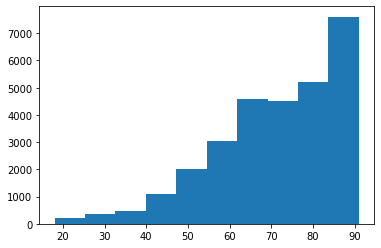

In [3]:
# approx age distribution of dead patients
plt.hist(df_patients[df_patients['dod'].notnull()]['anchor_age'])

In [4]:
df_admissions = pd.read_csv('/content/gdrive/MyDrive/mimic-iv/admissions.csv.gz')
df_admissions

,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admission_location,discharge_location,insurance,language,marital_status,race,edregtime,edouttime,hospital_expire_flag
0,10000032,22595853,2180-05-06 22:23:00,2180-05-07 17:15:00,NaN,URGENT,TRANSFER FROM HOSPITAL,HOME,Other,ENGLISH,WIDOWED,WHITE,2180-05-06 19:17:00,2180-05-06 23:30:00,0
1,10000032,22841357,2180-06-26 18:27:00,2180-06-27 18:49:00,NaN,EW EMER.,EMERGENCY ROOM,HOME,Medicaid,ENGLISH,WIDOWED,WHITE,2180-06-26 15:54:00,2180-06-26 21:31:00,0
2,10000032,25742920,2180-08-05 23:44:00,2180-08-07 17:50:00,NaN,EW EMER.,EMERGENCY ROOM,HOSPICE,Medicaid,ENGLISH,WIDOWED,WHITE,2180-08-05 20:58:00,2180-08-06 01:44:00,0
3,10000032,29079034,2180-07-23 12:35:00,2180-07-25 17:55:00,NaN,EW EMER.,EMERGENCY ROOM,HOME,Medicaid,ENGLISH,WIDOWED,WHITE,2180-07-23 05:54:00,2180-07-23 14:00:00,0
4,10000068,25022803,2160-03-03 23:16:00,2160-03-04 06:26:00,NaN,EU OBSERVATION,EMERGENCY ROOM,NaN,Other,ENGLISH,SINGLE,WHITE,2160-03-03 21:55:00,2160-03-04 06:26:00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431083,19999828,25744818,2149-01-08 16:44:00,2149-01-18 17:00:00,NaN,EW EMER.,TRANSFER FROM HOSPITAL,HOME HEALTH CARE,Other,ENGLISH,SINGLE,WHITE,2149-01-08 09:11:00,2149-01-08 18:12:00,0
431084,19999828,29734428,2147-07-18 16:23:00,2147-08-04 18:10:00,NaN,EW EMER.,PHYSICIAN REFERRAL,HOME HEALTH CARE,Other,ENGLISH,SINGLE,WHITE,2147-07-17 17:18:00,2147-07-18 17:34:00,0
431085,19999840,21033226,2164-09-10 13:47:00,2164-09-17 13:42:00,2164-09-17 13:42:00,EW EMER.,EMERGENCY ROOM,DIED,Other,ENGLISH,WIDOWED,WHITE,2164-09-10 11:09:00,2164-09-10 14:46:00,1
431086,19999840,26071774,2164-07-25 00:27:00,2164-07-28 12:15:00,NaN,EW EMER.,EMERGENCY ROOM,HOME,Other,ENGLISH,WIDOWED,WHITE,2164-07-24 21:16:00,2164-07-25 01:20:00,0


In [ ]:
df_admissions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 431088 entries, 0 to 431087
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   subject_id            431088 non-null  int64 
 1   hadm_id               431088 non-null  int64 
 2   admittime             431088 non-null  object
 3   dischtime             431088 non-null  object
 4   deathtime             8625 non-null    object
 5   admission_type        431088 non-null  object
 6   admission_location    431088 non-null  object
 7   discharge_location    311774 non-null  object
 8   insurance             431088 non-null  object
 9   language              431088 non-null  object
 10  marital_status        421868 non-null  object
 11  race                  431088 non-null  object
 12  edregtime             299260 non-null  object
 13  edouttime             299260 non-null  object
 14  hospital_expire_flag  431088 non-null  int64 
dtypes: int64(3), obje

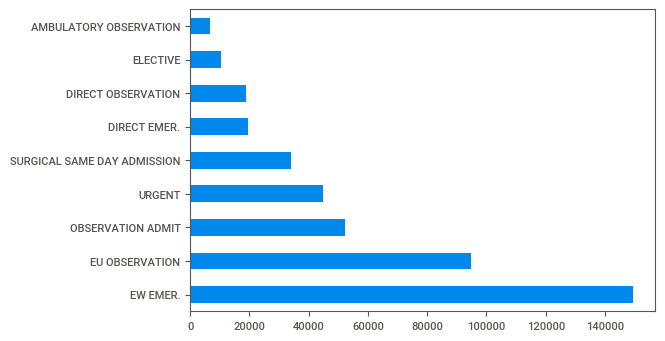

In [ ]:
# Bar chart of admission types
df_admissions['admission_type'].value_counts().plot(kind='barh')

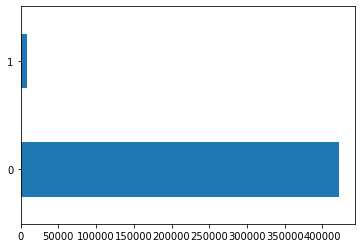

In [7]:
# Bar chart of admission types
df_admissions['hospital_expire_flag'].value_counts().plot(kind='barh')

# 0 - survival to hospital discharge
# 1 - death in the hospital


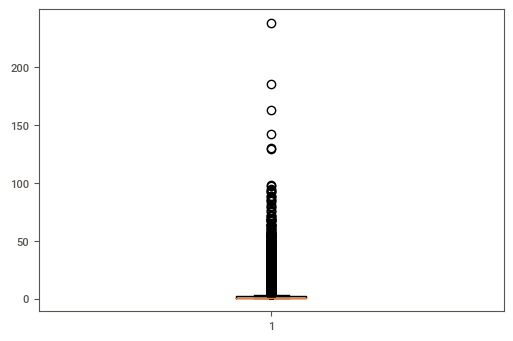

In [ ]:
# distribution for admissions per patients
plt.boxplot(df_admissions.groupby('subject_id')['hadm_id'].size());

In [5]:
import numpy as np
df_sub_race = df_admissions[['subject_id','race']].drop_duplicates(subset=['subject_id'])

In [6]:
# Combine races
df_sub_race['race'] = df_sub_race['race'].str.replace(r'(WHITE.*)','WHITE', regex=True)
df_sub_race['race'] = df_sub_race['race'].str.replace(r'(BLACK.*)','BLACK', regex=True)
df_sub_race['race'] = df_sub_race['race'].str.replace(r'(ASIAN.*)','ASIAN', regex=True)
df_sub_race['race'] = df_sub_race['race'].str.replace(r'(HISPANIC.*)','HISPANIC/LATINO', regex=True)
df_sub_race['race'] = df_sub_race['race'].str.replace('UNABLE TO OBTAIN','UNKNOWN', regex=True)
df_sub_race['race'] = df_sub_race['race'].str.replace('PATIENT DECLINED TO ANSWER','UNKNOWN', regex=True)
df_simplified_race = df_sub_race['race'].value_counts().reset_index()
df_simplified_race.columns = ['race', 'counts']
df_simplified_race

,race,counts
0,WHITE,120808
1,BLACK,23459
2,UNKNOWN,10113
3,HISPANIC/LATINO,9761
4,ASIAN,7552
5,OTHER,7464
6,PORTUGUESE,500
7,AMERICAN INDIAN/ALASKA NATIVE,387
8,MULTIPLE RACE/ETHNICITY,252
9,SOUTH AMERICAN,240


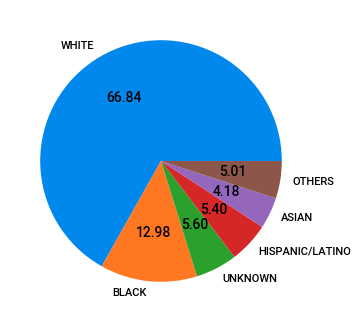

In [ ]:
pd.options.mode.chained_assignment = None
if df_simplified_race['race'].str.contains('OTHERS').any()==False:
  df_simplified_race.iloc[5] = df_simplified_race.iloc[5:].sum()
  df_simplified_race['race'][5] = 'OTHERS'

plt.pie(df_simplified_race['counts'][:6], labels=df_simplified_race['race'][:6], autopct='%.2f');

Calculating the length of stay, first to convert these columns to datetime objects using the to_datetime() function, and then subtract the admission date from the discharge date to get the difference in days. (as length_of_stay)

In [7]:
df_admissions['los'] = (pd.to_datetime(df_admissions['dischtime'])-pd.to_datetime(df_admissions['admittime']))/pd.Timedelta(hours=1)

In [8]:
df_admissions.head()

,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admission_location,discharge_location,insurance,language,marital_status,race,edregtime,edouttime,hospital_expire_flag,los
0,10000032,22595853,2180-05-06 22:23:00,2180-05-07 17:15:00,NaN,URGENT,TRANSFER FROM HOSPITAL,HOME,Other,ENGLISH,WIDOWED,WHITE,2180-05-06 19:17:00,2180-05-06 23:30:00,0,18.866667
1,10000032,22841357,2180-06-26 18:27:00,2180-06-27 18:49:00,NaN,EW EMER.,EMERGENCY ROOM,HOME,Medicaid,ENGLISH,WIDOWED,WHITE,2180-06-26 15:54:00,2180-06-26 21:31:00,0,24.366667
2,10000032,25742920,2180-08-05 23:44:00,2180-08-07 17:50:00,NaN,EW EMER.,EMERGENCY ROOM,HOSPICE,Medicaid,ENGLISH,WIDOWED,WHITE,2180-08-05 20:58:00,2180-08-06 01:44:00,0,42.100000
3,10000032,29079034,2180-07-23 12:35:00,2180-07-25 17:55:00,NaN,EW EMER.,EMERGENCY ROOM,HOME,Medicaid,ENGLISH,WIDOWED,WHITE,2180-07-23 05:54:00,2180-07-23 14:00:00,0,53.333333
4,10000068,25022803,2160-03-03 23:16:00,2160-03-04 06:26:00,NaN,EU OBSERVATION,EMERGENCY ROOM,NaN,Other,ENGLISH,SINGLE,WHITE,2160-03-03 21:55:00,2160-03-04 06:26:00,0,7.166667


In [12]:
#The mean length of stay
df_admissions['los'].mean()

107.51788467010601

In [9]:
df_merged = pd.merge(df_patients[['subject_id','gender','anchor_age']], df_admissions[['subject_id','hadm_id','los','admission_type','insurance','marital_status','race','hospital_expire_flag']], on='subject_id', how='inner')
df_merged

,subject_id,gender,anchor_age,hadm_id,los,admission_type,insurance,marital_status,race,hospital_expire_flag
0,10000032,F,52,22595853,18.866667,URGENT,Other,WIDOWED,WHITE,0
1,10000032,F,52,22841357,24.366667,EW EMER.,Medicaid,WIDOWED,WHITE,0
2,10000032,F,52,25742920,42.100000,EW EMER.,Medicaid,WIDOWED,WHITE,0
3,10000032,F,52,29079034,53.333333,EW EMER.,Medicaid,WIDOWED,WHITE,0
4,10000068,F,19,25022803,7.166667,EU OBSERVATION,Other,SINGLE,WHITE,0
...,...,...,...,...,...,...,...,...,...,...
431083,19999828,F,46,25744818,240.266667,EW EMER.,Other,SINGLE,WHITE,0
431084,19999828,F,46,29734428,409.783333,EW EMER.,Other,SINGLE,WHITE,0
431085,19999840,M,58,21033226,167.916667,EW EMER.,Other,WIDOWED,WHITE,1
431086,19999840,M,58,26071774,83.800000,EW EMER.,Other,WIDOWED,WHITE,0


In [14]:
df_merged['los'].describe()

count    431088.000000
mean        107.517885
std         158.585811
min         -22.683333
25%          25.666667
50%          65.633333
75%         125.666667
max        7103.716667
Name: los, dtype: float64

In [10]:
df_merged[df_merged['los'] < 0]

,subject_id,gender,anchor_age,hadm_id,los,admission_type,insurance,marital_status,race,hospital_expire_flag
2084,10049642,F,70,26714941,-0.750000,EW EMER.,Other,NaN,UNKNOWN,1
3152,10077373,F,79,23874669,-6.866667,DIRECT OBSERVATION,Medicare,MARRIED,WHITE,0
5551,10136283,F,22,29334858,-18.183333,EU OBSERVATION,Other,SINGLE,WHITE,0
11307,10270064,M,40,29192733,-3.500000,EW EMER.,Other,MARRIED,UNKNOWN,0
11370,10271174,M,76,26331353,-0.633333,EW EMER.,Medicare,NaN,UNKNOWN,1
...,...,...,...,...,...,...,...,...,...,...
426103,19887023,M,91,24942188,-9.900000,EW EMER.,Other,MARRIED,WHITE,1
426877,19904685,M,49,24196469,-14.816667,EW EMER.,Other,MARRIED,WHITE,1
427406,19914761,M,86,22348782,-18.450000,EW EMER.,Medicare,SINGLE,WHITE,1
429724,19966756,M,72,29577757,-1.400000,EW EMER.,Other,MARRIED,BLACK/AFRICAN AMERICAN,0


There are rows with negative los, this indicates time of death before admission, dropping the rows with negative los.

In [11]:
df_merged = df_merged[df_merged['los'] > 0]
df_merged.describe()

,subject_id,anchor_age,hadm_id,los,hospital_expire_flag
count,4.309480e+05,430948.000000,4.309480e+05,430948.000000,430948.000000
mean,1.500407e+07,56.904295,2.500050e+07,107.555125,0.019882
std,2.881211e+06,19.041340,2.887728e+06,158.598054,0.139594
min,1.000003e+07,18.000000,2.000002e+07,0.016667,0.000000
25%,1.250483e+07,43.000000,2.249966e+07,25.700000,0.000000
50%,1.501288e+07,58.000000,2.500268e+07,65.650000,0.000000
75%,1.750022e+07,72.000000,2.750143e+07,125.716667,0.000000
max,1.999999e+07,91.000000,2.999993e+07,7103.716667,1.000000


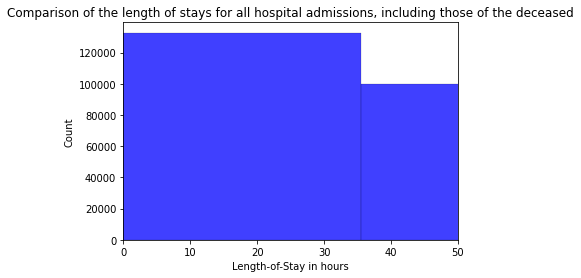

In [12]:
import seaborn as sns

# Use seaborn to create a histogram of the 'los' column
sns.histplot(df_merged['los'], bins=200, color='blue')

# Set the x-axis limits to 0-50
plt.xlim(0, 50)

# Add a title and axis labels
plt.title('Comparison of the length of stays for all hospital admissions, including those of the deceased')
plt.ylabel('Count')
plt.xlabel('Length-of-Stay in hours')

# Show the plot
plt.show()

In [13]:
# Count the number of patients who died at the hospital and the total number of patients
num_died = df_merged['hospital_expire_flag'].sum()
num_patients = df_merged['subject_id'].nunique()

# Use an f-string to create the output string
output = f"{num_died} of {num_patients} patients died at the hospital"

# Print the output string
print(output)


8568 of 180690 patients died at the hospital


In [19]:
# Count the number of 0s in the 'col' column
num_zeros = (df_merged['hospital_expire_flag'] == 1).sum()

print(num_zeros)

8568


Age Column

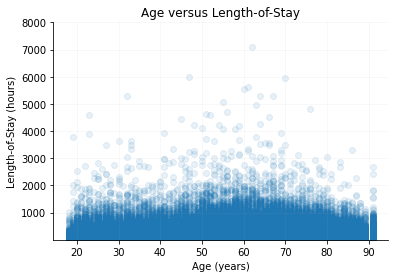

In [14]:
import matplotlib.pyplot as plt

# Create a scatterplot of 'anchor_age' and 'los'
plt.scatter(df_merged['anchor_age'], df_merged['los'], alpha=0.1)

# Add axis labels and a title
plt.ylabel('Length-of-Stay (hours)')
plt.xlabel('Age (years)')
plt.title('Age versus Length-of-Stay')

# Set the y-axis limits
plt.ylim(1, 8000)

# Add gridlines
plt.grid(True, alpha=0.1)

# Remove the top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Show the plot
plt.show()


In [15]:
import pandas as pd

# Define the age ranges
age_ranges = [(0, 35), (36, 55), (56, 100)]

# Convert the 'anchor_age' column to a numeric data type
df_merged['anchor_age'] = df_merged['anchor_age'].astype(int)

# Create a new column 'age_range' that contains the age range for each patient
df_merged['age_range'] = pd.cut(df_merged['anchor_age'], bins=[range[0] for range in age_ranges] + [age_ranges[-1][1] + 1], labels=['youth', 'adult', 'senior'])

# Print the value counts for the new column
print(df_merged['age_range'].value_counts())


senior    229732
adult     123421
youth      77795
Name: age_range, dtype: int64


<ipython-input-15-f8a797fc11b9>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged['anchor_age'] = df_merged['anchor_age'].astype(int)
<ipython-input-15-f8a797fc11b9>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged['age_range'] = pd.cut(df_merged['anchor_age'], bins=[range[0] for range in age_ranges] + [age_ranges[-1][1] + 1], labels=['youth', 'adult', 'senior'])


Race column

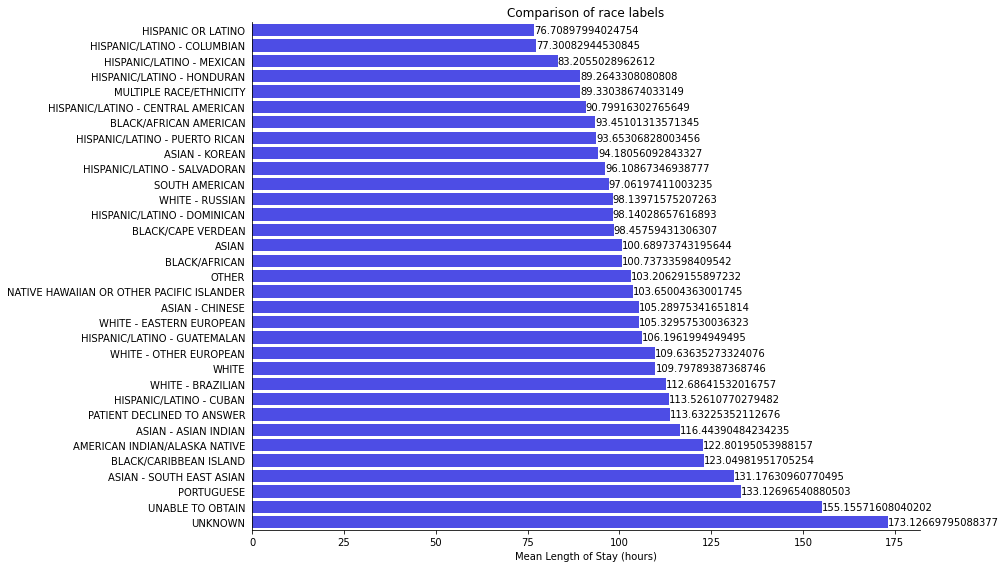

In [40]:
import seaborn as sns

def plot_los_groupby(df, variable, size=(10,6)): 

    #Plot Median LOS by dataframe categorical series name 
    
    results = df[[variable, 'los']].groupby(variable).mean().reset_index().sort_values('los', ascending=True)
    values = results['los'].values
    labels = results[variable].values

    # Create the bar plot using seaborn
    plt.figure(figsize=size)
    ax = sns.barplot(x=values, y=labels, color='blue', alpha=0.8)

    # Annotate the plot with the median LOS values
    for i, value in enumerate(values):
        ax.text(value, i, value, ha="left", va="center")

    # Customize the plot
    ax.set_xlabel('Mean Length of Stay (hours)')
    ax.set_title('Comparison of {} labels'.format(variable))
    ax.tick_params(left=False, top=False, right=False)
    ax.spines['top'].set_visible(False)  # Remove top spine
    ax.spines['right'].set_visible(False)  # Remove right spine
    plt.tight_layout()
    plt.show()

# Look at median LOS for groups 'race'
plot_los_groupby(df_merged, 'race', size=(14,8))

admission_type column

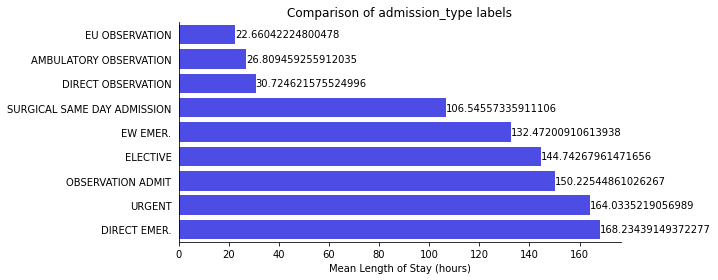

In [41]:
# Look at mean LOS for groups ADMISSION_TYPE
import seaborn as sns

def plot_los_groupby(df, variable, size=(10,6)):
    ''' 
    Plot Median LOS by dataframe categorical series name 
    '''
    results = df[[variable, 'los']].groupby(variable).mean().reset_index().sort_values('los', ascending=True)
    values = results['los'].values
    labels = results[variable].values

    # Create the bar plot using seaborn
    plt.figure(figsize=size)
    ax = sns.barplot(x=values, y=labels, color='blue', alpha=0.8)

    # Annotate the plot with the median LOS values
    for i, value in enumerate(values):
        ax.text(value, i, value, ha="left", va="center")

    # Customize the plot
    ax.set_xlabel('Mean Length of Stay (hours)')
    ax.set_title('Comparison of {} labels'.format(variable))
    ax.tick_params(left=False, top=False, right=False)
    ax.spines['top'].set_visible(False)  # Remove top spine
    ax.spines['right'].set_visible(False)  # Remove right spine
    plt.tight_layout()
    plt.show()

# Look at median LOS for groups 'admission_type'
plot_los_groupby(df_merged, 'admission_type', size=(10,4))

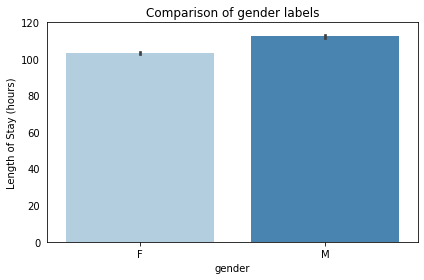

In [74]:
import seaborn as sns

def barplot_los_groupby(df_merged, gender, los_range=(-1, 30), size=(15,8)):
    ''' 
    Bar plot of LOS by df categorical series name 
    '''
    results = df_merged[['gender', 'los']].groupby('gender').mean().reset_index().sort_values('los', ascending=True)
    categories = results['gender'].values.tolist()

    hist_data = []
    for cat in categories:
        hist_data.append(df_merged['los'].loc[df_merged[gender]==cat].values)

    # Create the bar plot using seaborn
    ax = sns.barplot(x='gender', y='los', data=df_merged, orient='v', palette='Blues')
    ax.set_xticklabels(categories)
    ax.set_ylim(los_range)
    ax.set_ylabel('Length of Stay (hours)')
    ax.set_title('Comparison of {} labels'.format('gender'))
    ax.tick_params(left=False, top=False, right=False)
    plt.tight_layout()
    plt.show()
barplot_los_groupby(df_merged, 'gender', los_range=(0, 120))

In [75]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 430948 entries, 0 to 431087
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   subject_id            430948 non-null  int64   
 1   gender                430948 non-null  object  
 2   anchor_age            430948 non-null  int64   
 3   hadm_id               430948 non-null  int64   
 4   los                   430948 non-null  float64 
 5   admission_type        430948 non-null  object  
 6   insurance             430948 non-null  object  
 7   marital_status        421751 non-null  object  
 8   race                  430948 non-null  object  
 9   hospital_expire_flag  430948 non-null  int64   
 10  age_range             430948 non-null  category
dtypes: category(1), float64(1), int64(4), object(5)
memory usage: 52.7+ MB


In [81]:
# removing the patients who died as they are not required to predict the los
df_merged = df_merged[df_merged['hospital_expire_flag'] == 0.0]
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 422380 entries, 0 to 431087
Data columns (total 9 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   gender                422380 non-null  object  
 1   anchor_age            422380 non-null  int64   
 2   los                   422380 non-null  float64 
 3   admission_type        422380 non-null  object  
 4   insurance             422380 non-null  object  
 5   marital_status        414272 non-null  object  
 6   race                  422380 non-null  object  
 7   hospital_expire_flag  422380 non-null  int64   
 8   age_range             422380 non-null  category
dtypes: category(1), float64(1), int64(2), object(5)
memory usage: 29.4+ MB


In [82]:
# Drop unused or no longer needed columns
df_merged.drop(columns=['anchor_age'], inplace=True)

df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 422380 entries, 0 to 431087
Data columns (total 8 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   gender                422380 non-null  object  
 1   los                   422380 non-null  float64 
 2   admission_type        422380 non-null  object  
 3   insurance             422380 non-null  object  
 4   marital_status        414272 non-null  object  
 5   race                  422380 non-null  object  
 6   hospital_expire_flag  422380 non-null  int64   
 7   age_range             422380 non-null  category
dtypes: category(1), float64(1), int64(1), object(5)
memory usage: 26.2+ MB


In [84]:
# Converting gender variable into boolean
df_merged['gender'].replace({'F': 0, 'M':1}, inplace=True)
df_merged.head()

,gender,los,admission_type,insurance,marital_status,race,hospital_expire_flag,age_range
0,0,18.866667,URGENT,Other,WIDOWED,WHITE,0,adult
1,0,24.366667,EW EMER.,Medicaid,WIDOWED,WHITE,0,adult
2,0,42.100000,EW EMER.,Medicaid,WIDOWED,WHITE,0,adult
3,0,53.333333,EW EMER.,Medicaid,WIDOWED,WHITE,0,adult
4,0,7.166667,EU OBSERVATION,Other,SINGLE,WHITE,0,youth


In [85]:
# Check for any remaining NaNs
df_merged.isnull().values.sum()

8108

In [91]:
df_merged['marital_status'].unique()

array(['WIDOWED', 'SINGLE', 'MARRIED', 'DIVORCED'], dtype=object)

In [90]:
df_merged.dropna(subset=['marital_status'], inplace=True)

In [93]:
# Check for null values and sort the resulting series in descending order
null_counts = df_merged.isnull().sum().sort_values(ascending=False)

# Display the null counts for each column
print(null_counts)

gender                  0
los                     0
admission_type          0
insurance               0
marital_status          0
race                    0
hospital_expire_flag    0
age_range               0
dtype: int64


Test - Train split

In [98]:
from sklearn.model_selection import train_test_split

# Split into training set 80% and test set 20%
X = df_merged['los'].values.reshape(-1, 1) # reshape 'los' column to a 2D array
y = df_merged['los'].values # keep the 'los' column as the target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .20, random_state = 0)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 331417 samples.
Testing set has 82855 samples.
